In [10]:
import itertools
import glob
import numpy as np
import pandas as pd
import pickle as pkl
import torch 
from torchvision import datasets, transforms
# from utils import * # get the dataset
from pyhessian import hessian # Hessian computation
# from density_plot import get_esd_plot # ESD plot
# from pytorchcv.model_provider import get_model as ptcv_get_model # model
from swadist.models import ResNet
from swadist.data import get_dataloaders

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 250
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "14"

In [11]:
hparams_table = pd.read_csv(
    'results/tensorboard/05-experiments/2022-05-13-commit-901fcc2-hparams_table.csv')

In [12]:
hparams_table = hparams_table[hparams_table['global_batch_size'] < 4000]

In [13]:
hparams_table.head()

,name,global_batch_size,hparams step/best validation cross_entropy step,hparams step/best validation cross_entropy,hparams step/best validation acc step,hparams step/best validation acc,hparams epoch/best validation cross_entropy epoch,hparams epoch/best validation cross_entropy,hparams epoch/best validation acc epoch,hparams epoch/best validation acc
0,bs2048-codist,2048.0,4378.0,0.898247,4378.0,0.693959,199.0,0.898247,199.0,0.693959
1,bs2048-sgd,2048.0,1408.0,0.871014,1408.0,0.702283,64.0,0.871014,64.0,0.702283
2,bs2048-swadist-replicas,2048.0,3410.0,0.882834,3410.0,0.700143,155.0,0.882834,155.0,0.700143
3,bs2048-swadist,2048.0,4246.0,0.936619,4400.0,0.678906,193.0,0.936619,200.0,0.678906
4,bs512-codist,512.0,1672.0,0.881016,1672.0,0.700867,19.0,0.881016,19.0,0.700867


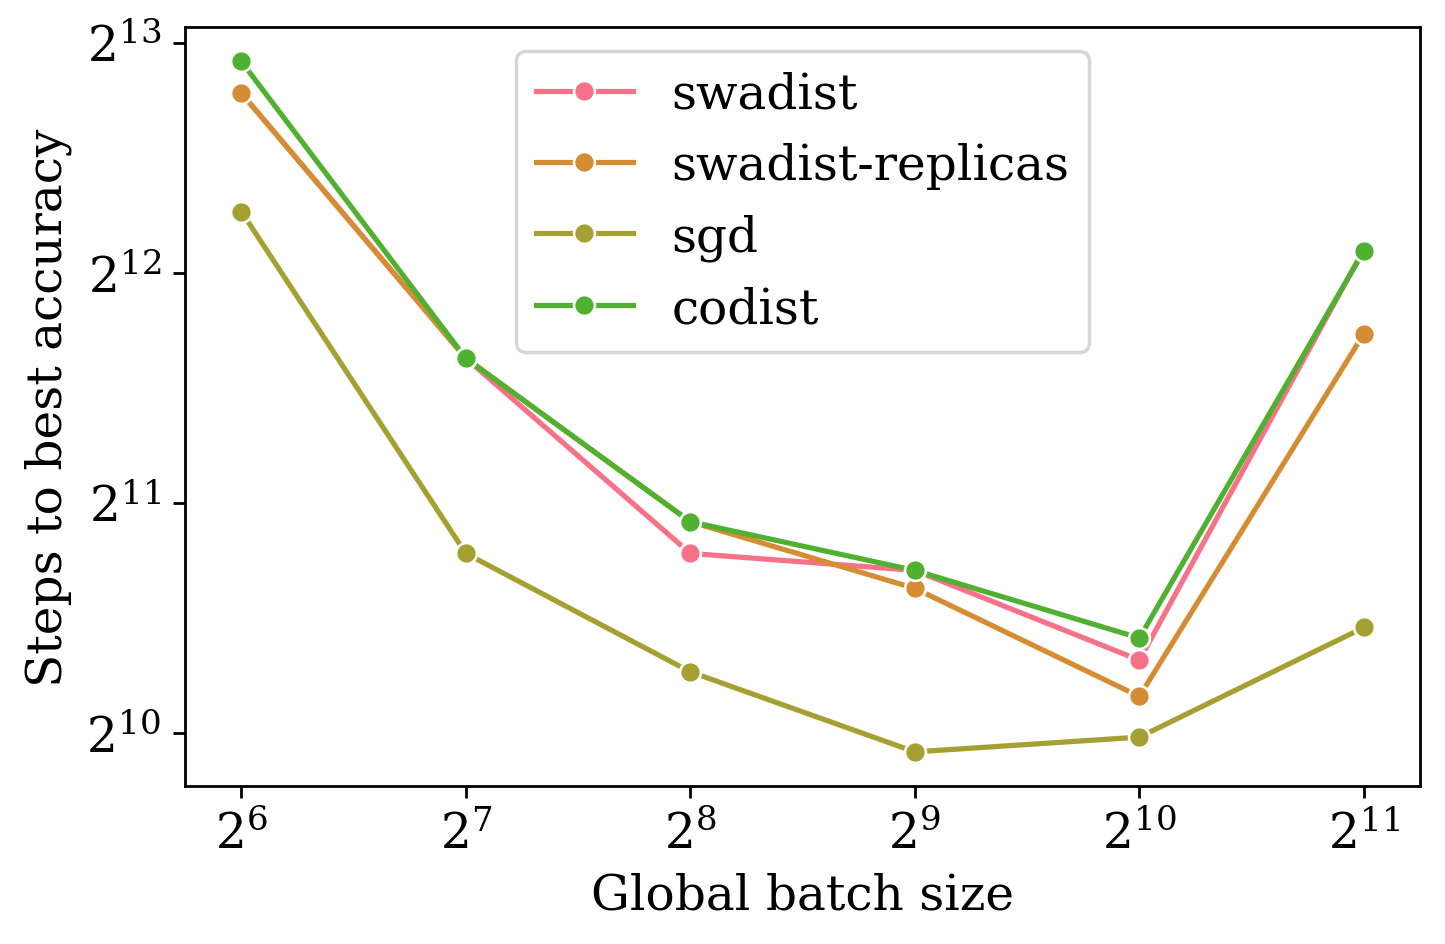

In [27]:
fig = plt.figure()
for i, name in enumerate(
    ['swadist', 'swadist-replicas', 'sgd', 'codist']):
    name_df = hparams_table[hparams_table.name.str.endswith(name)]
    name_df_sort_ind = name_df['global_batch_size'].argsort()
    sns.lineplot(
        x=name_df['global_batch_size'].iloc[name_df_sort_ind],
        y=name_df['hparams step/best validation acc step'].iloc[name_df_sort_ind],
        label=name,
        marker='o',
        color=sns.color_palette("husl", 9)[i])
plt.xscale(value='log', base=2)
plt.yscale(value='log', base=2)
plt.legend()
plt.ylabel('Steps to best accuracy')
plt.xlabel('Global batch size')
plt.tight_layout()
plt.savefig('fig1.pdf')